In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('../data/raw_data.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (973, 15)

First 5 rows:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/we

In [4]:
# Statistical summary of numerical columns
print("Statistical Summary:")
print(df.describe())

print("\n\nCategorical columns value counts:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Statistical Summary:
              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000      

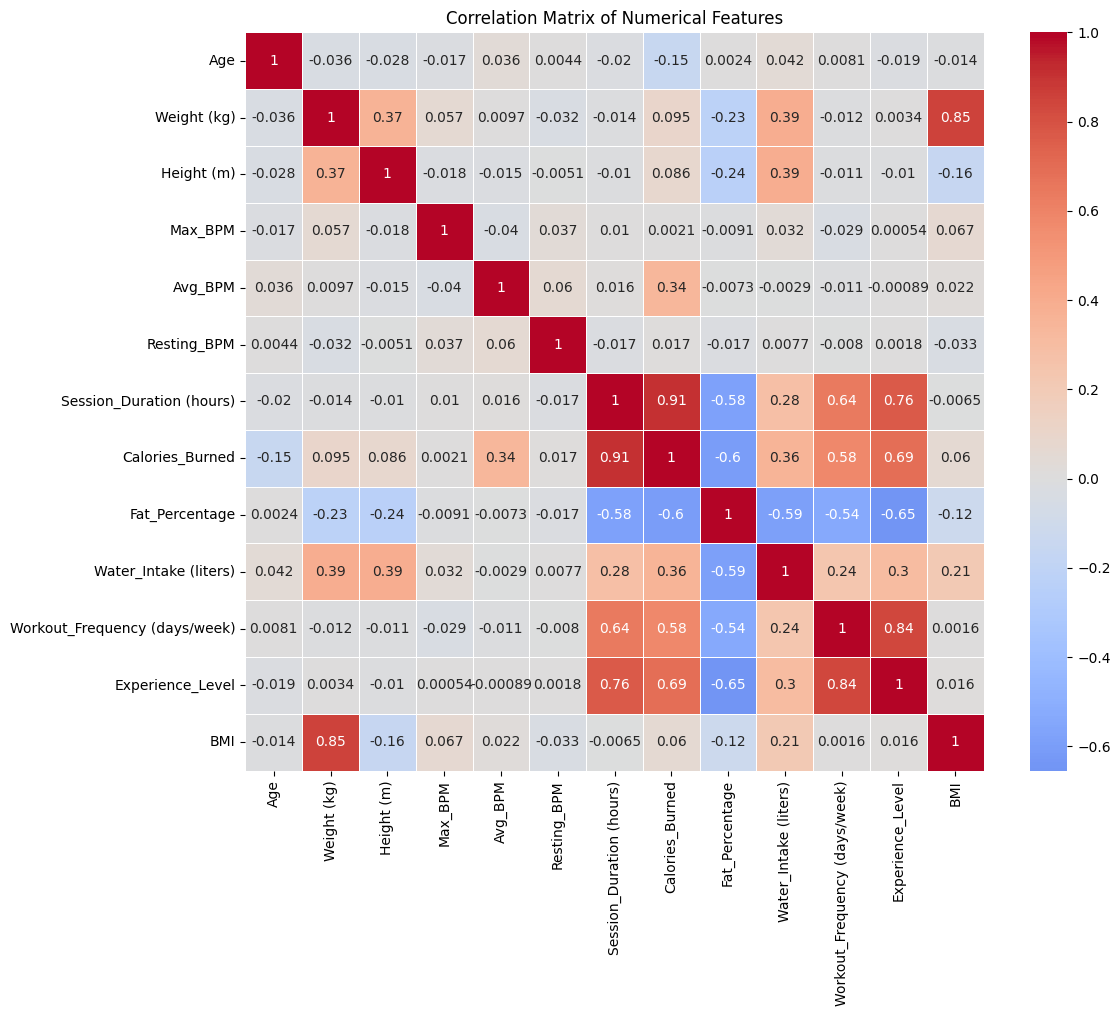


Correlation with Calories_Burned (sorted by absolute value):
Session_Duration (hours): 0.9081
Experience_Level: 0.6941
Fat_Percentage: -0.5976
Workout_Frequency (days/week): 0.5762
Water_Intake (liters): 0.3569
Avg_BPM: 0.3397
Age: -0.1547
Weight (kg): 0.0954
Height (m): 0.0863
BMI: 0.0598
Resting_BPM: 0.0165
Max_BPM: 0.0021


In [5]:
# Correlation analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Show correlations with target variable (Calories_Burned)
print("\nCorrelation with Calories_Burned (sorted by absolute value):")
target_corr = correlation_matrix['Calories_Burned'].drop('Calories_Burned')
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
for feature in target_corr_sorted.index:
    print(f"{feature}: {target_corr[feature]:.4f}")

In [ ]:
# Distribution of numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, 5 * n_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()